# Logistic Regression

## Import Library 

In [100]:
import pandas as pd
import numpy as np
import numpy as np
from numpy import log, dot, e
from numpy.random import rand
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Lukemia cancer dataset

In [101]:
col_names = ['Max_NM_pixel','Mean_global', 'SD_global','center_x', 'center_y', 'radius', 'diagnosis']
data = pd.read_csv("combine.csv")
feature_cols = ['Max_NM_pixel','Mean_global', 'SD_global', 'radius']

X = data[feature_cols]
y = data.diagnosis

<ipython-input-102-2e0c65305ed5>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Class Distribution', fontSize=15)


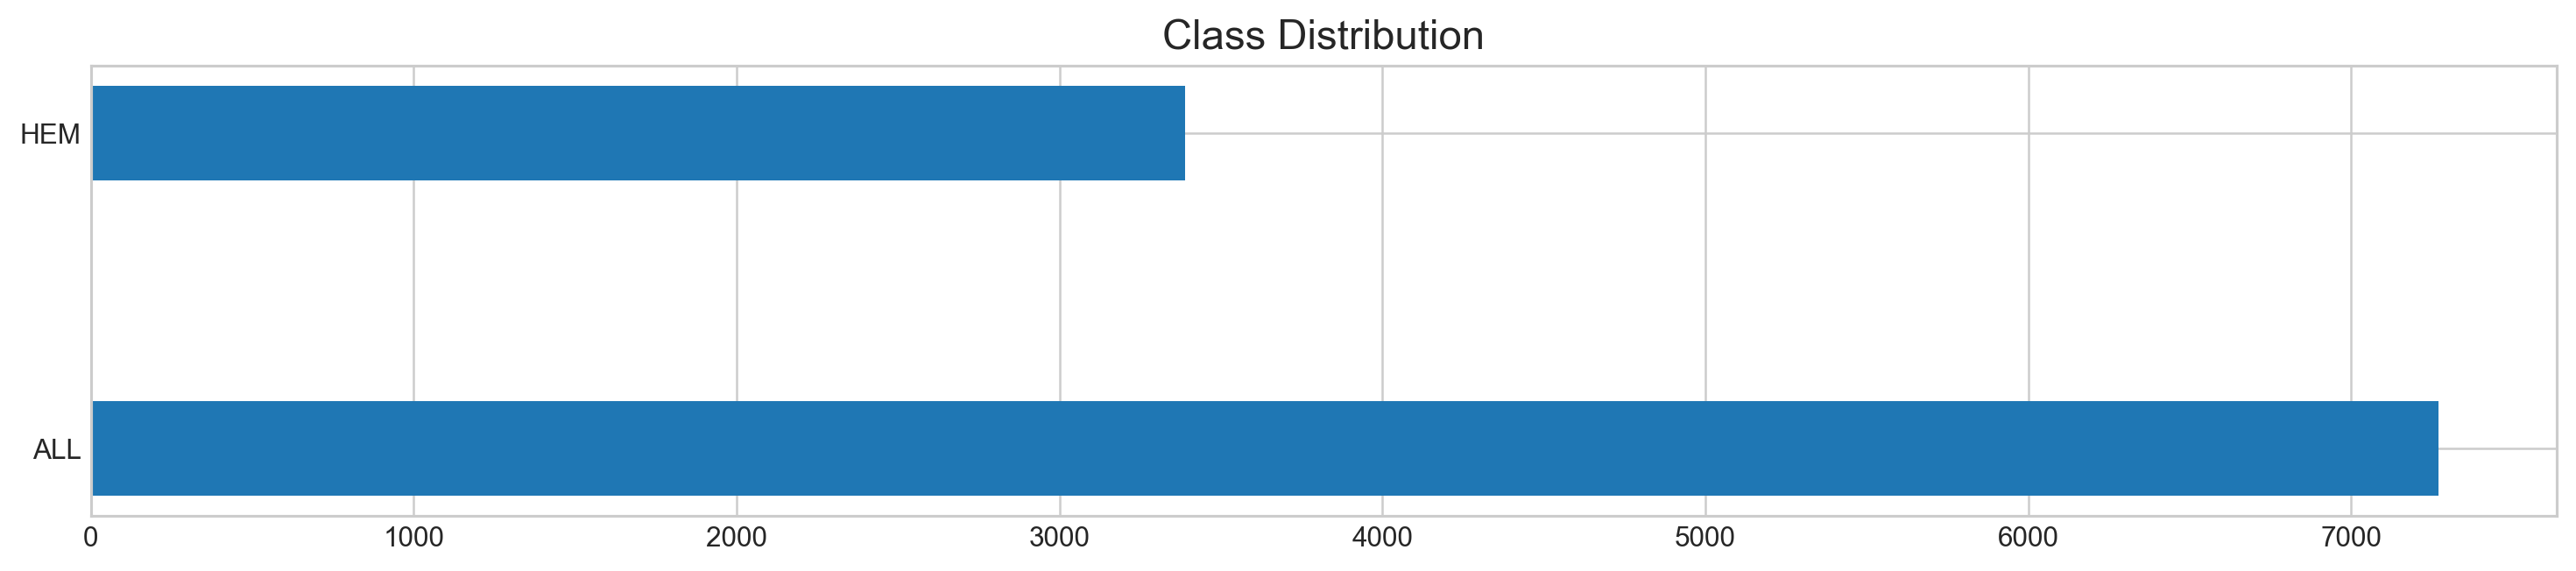

In [102]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,3)
plt.barh(['ALL','HEM'],[sum(y), len(y)-sum(y)], height=0.3)
plt.title('Class Distribution', fontSize=15)
plt.show()

<ipython-input-103-1801d2b20fa7>:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Binary Cross-Entropy Loss', fontSize=17)
<ipython-input-103-1801d2b20fa7>:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Predicted Value', fontSize=14)
<ipython-input-103-1801d2b20fa7>:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Loss', fontSize=14)


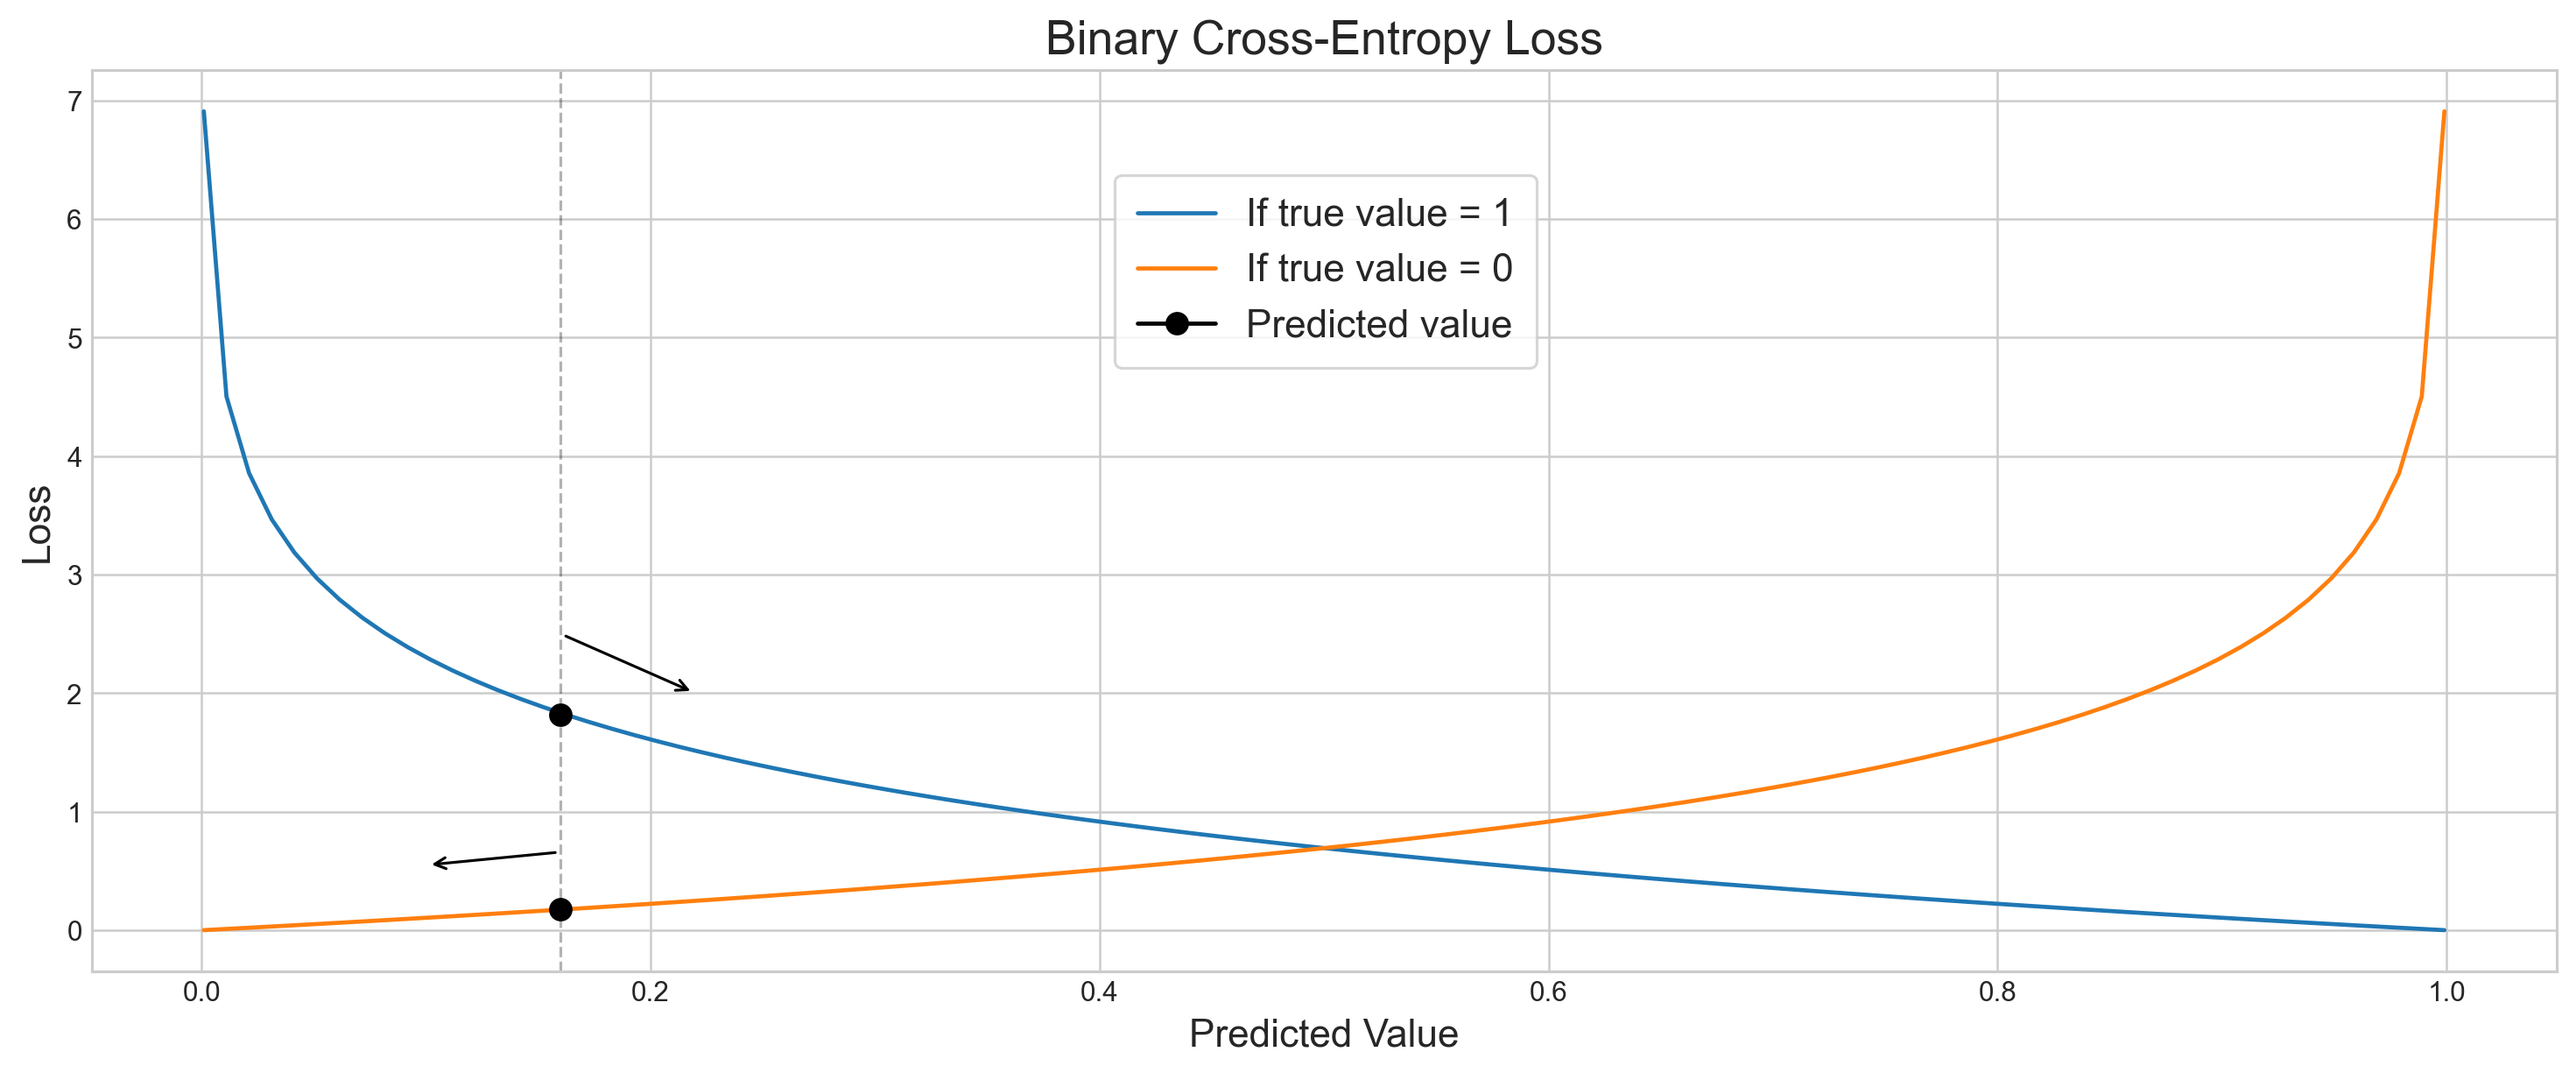

In [103]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,6)

#plt.subplot(121)
plt.plot(np.linspace(0.001, 0.999, 100), [abs(np.log(i)) for i in np.linspace(0.001, 0.999, 100)], label='If true value = 1')
plt.plot(np.linspace(0.001, 0.999, 100), [abs(np.log(1 - i)) for i in np.linspace(0.001, 0.999, 100)], label='If true value = 0')

plt.plot(0.16, 1.818352371073392, marker='.', markersize=15, c='k', label='Predicted value')
plt.plot(0.16, 0.17708679723835707, marker='.', markersize=15, c='k')

plt.axvline(0.16, c='k', alpha=0.3, ls='--', lw=1)

plt.annotate("", xy=(0.22, 2), xytext=(0.16, 2.5), arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=(0.1, 0.55), xytext=(0.16, 0.66), arrowprops=dict(arrowstyle="->"))

plt.legend(loc=(0.415,0.67), frameon=True, fontsize=14, borderpad=.6)
plt.title('Binary Cross-Entropy Loss', fontSize=17)
plt.xlabel('Predicted Value', fontSize=14)
plt.ylabel('Loss', fontSize=14)
plt.show()

In [104]:
pd.DataFrame(np.concatenate((X, y[:, None]), axis=1), columns=np.append(feature_cols, 'diagonosis')).head()

<ipython-input-104-d859d6ea31a2>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pd.DataFrame(np.concatenate((X, y[:, None]), axis=1), columns=np.append(feature_cols, 'diagonosis')).head()


,Max_NM_pixel,Mean_global,SD_global,radius,diagonosis
0,0.478431,13.924183,30.215250,128.0,1.0
1,0.498039,17.189129,33.770287,183.0,1.0
2,0.670588,19.350847,36.015213,180.0,1.0
3,0.505882,17.857874,34.366390,179.0,1.0
4,0.576471,11.770942,29.151751,113.0,1.0


## Scaling

In [105]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

## Train and Test Data

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

## Logistic Regression

In [107]:
class LogisticRegression:
    
    def sigmoid(self, z): return 1 / (1 + e**(-z))
    
    def cost_function(self, X, y, weights):                 
        z = dot(X, weights)        
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))        
        return -sum(predict_1 + predict_0) / len(X)
    
    def fit(self, X, y, epochs=25, lr=0.05):        
        loss = []
        weights = rand(X.shape[1])
        N = len(X)
                 
        for _ in range(epochs):        
            # Gradient Descent
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_hat - y) / N            
            # Saving Progress
            loss.append(self.cost_function(X, y, weights)) 
            
        self.weights = weights
        self.loss = loss
    
    def predict(self, X):        
        # Predicting with sigmoid function
        z = dot(X, self.weights)
        # Returning binary result
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

## Prediction

In [108]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train, epochs=500, lr=0.5)
y_pred = logreg.predict(X_test)

## Evaluation

In [109]:
print(classification_report(y_test, y_pred))
print('-'*55)
print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.55      0.61      1111
         1.0       0.81      0.88      0.84      2408

    accuracy                           0.78      3519
   macro avg       0.75      0.72      0.73      3519
weighted avg       0.77      0.78      0.77      3519

-------------------------------------------------------
Confusion Matrix

[[ 615  496]
 [ 287 2121]]


<ipython-input-110-9153247651fe>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Logistic Regression Training', fontSize=15)
<ipython-input-110-9153247651fe>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Epochs', fontSize=12)
<ipython-input-110-9153247651fe>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Loss', fontSize=12)


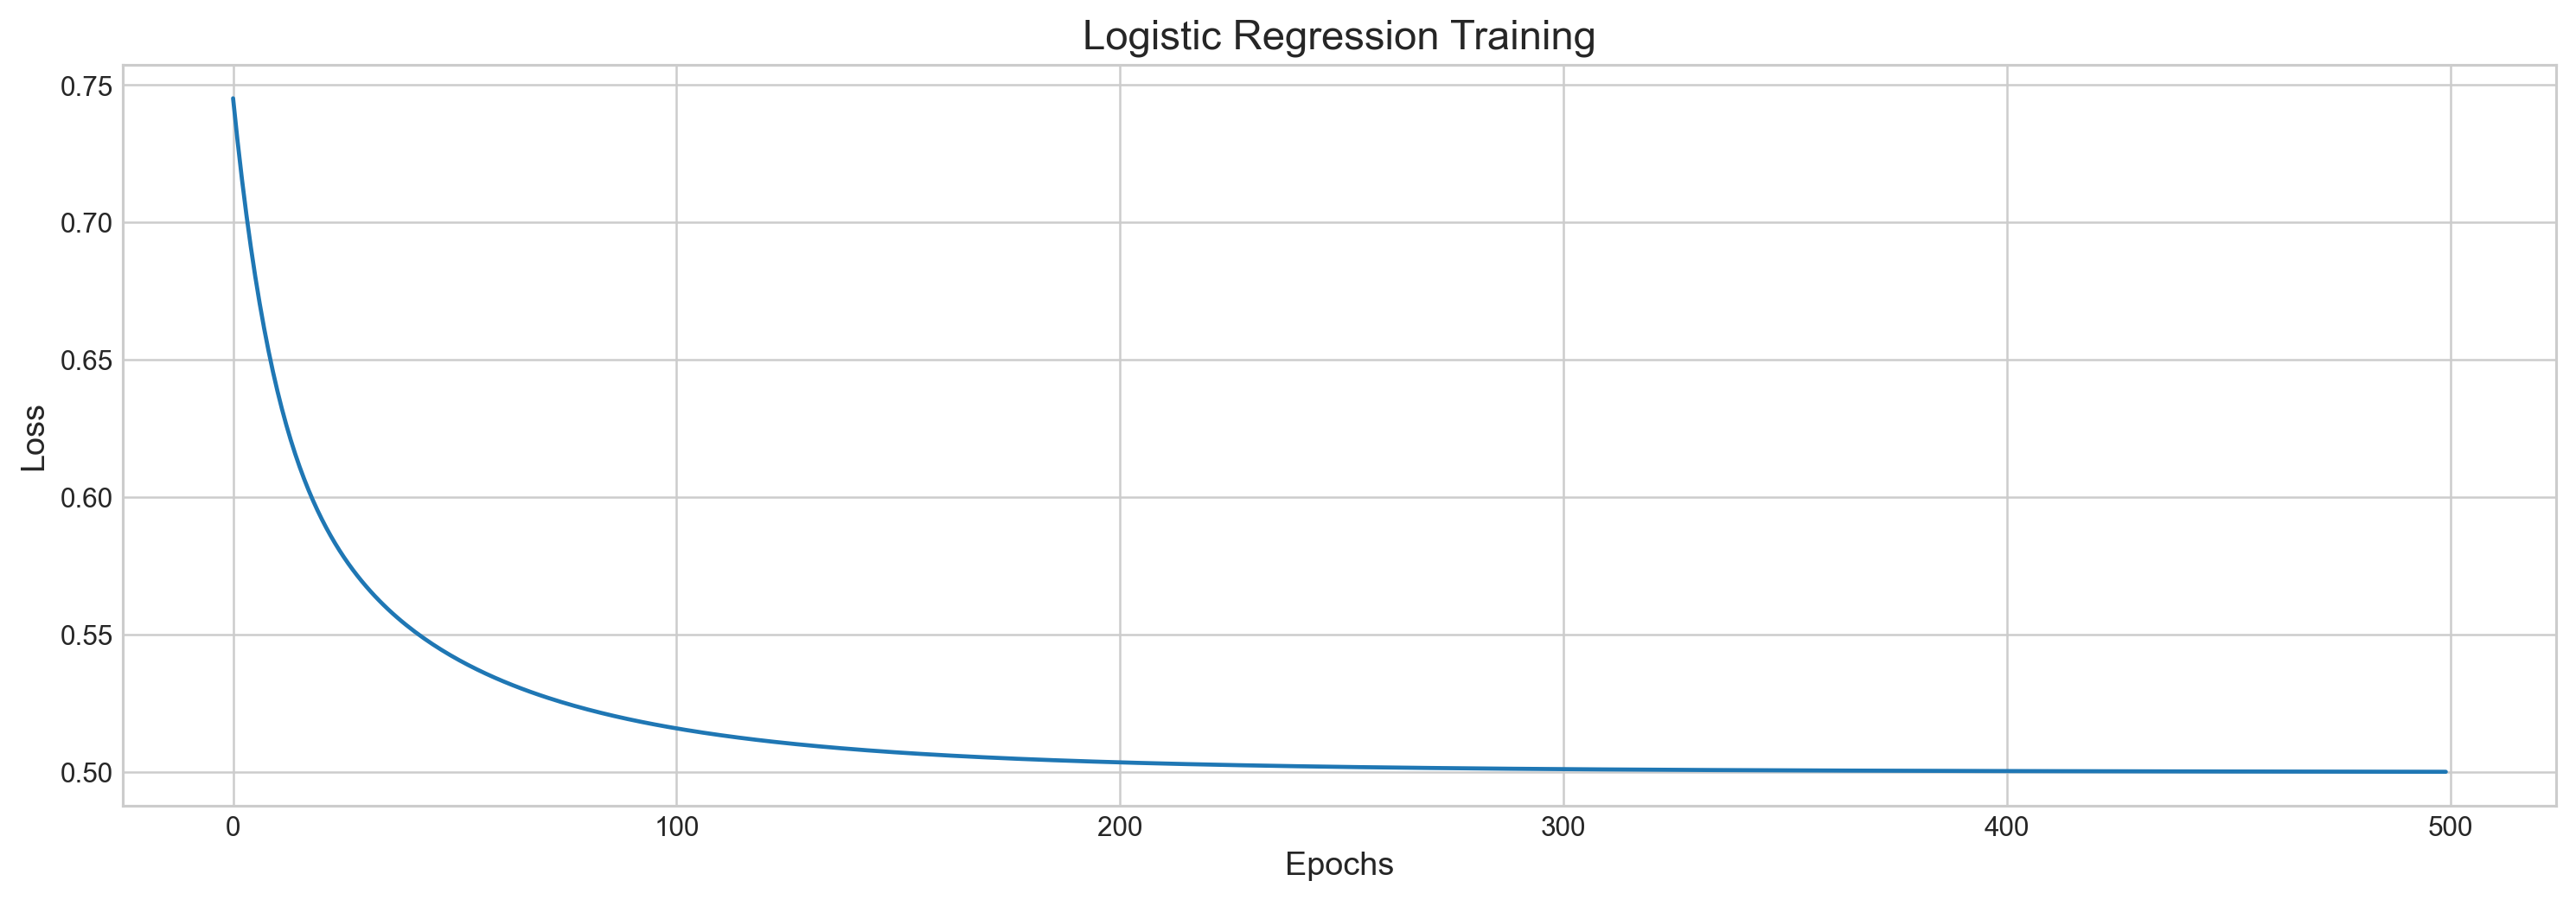

In [110]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,5)
plt.plot(logreg.loss)
plt.title('Logistic Regression Training', fontSize=15)
plt.xlabel('Epochs', fontSize=12)
plt.ylabel('Loss', fontSize=12)
plt.show()